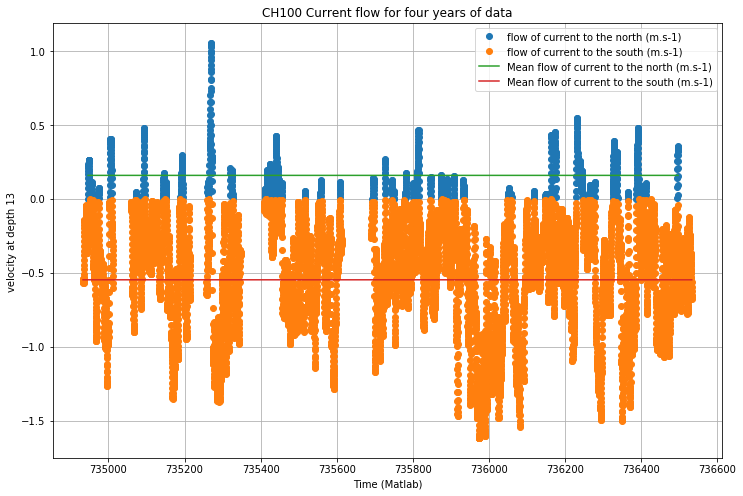

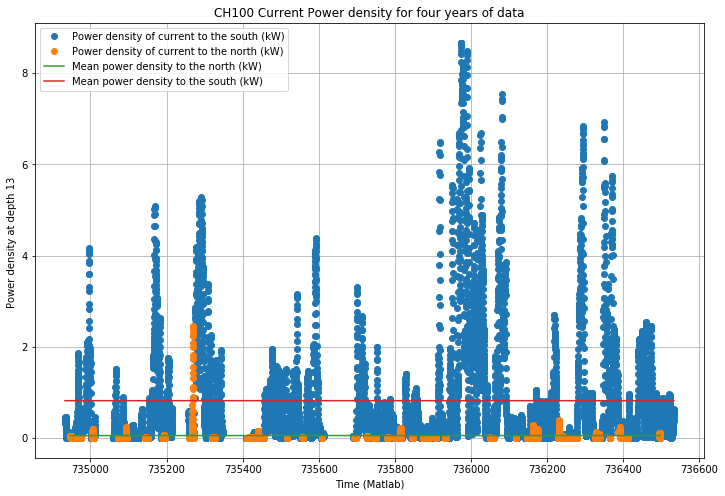

In [48]:
%matplotlib inline
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt 

data = sio.loadmat('/media/z3525831/Transcend/UNSW/DATA ADCP/CH100_nostructure.mat')

data_U = data['U']
data_V = data['V']
data_depthV = data['depthV']
data_t = data['t']
data_timeDV = data['timeDV']                      # We must define variables for each list key in the "data"                     
data_u25 = data['u25']                            # dictionary in order to be able to exploit them.
data_u55 = data['u55']
data_u90 = data['u90']
data_v25 = data['v25']
data_v55 = data['v55']
data_v90 = data['v90']


import datetime as dt
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))                       # Conversion of Matlab time data to  
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366) #'classic python time data.
    return day + dayfrac
t = data_t[0,:]
# convert Matlab variable "t" into list of python datetime objects.
py_t = [matlab2datetime(tval) for tval in t]

# Creation of the variable P (Power density of the current).
V = (data_U*data_U) + (data_V*data_V)
Vf = np.sqrt(V)                        
P = 0.5 * 1025 * 4 * (Vf*Vf*Vf)     # So P = 1/2 * 1025 * 4 * Vf^3.
Pf = P/1000                         # Converting unit W to kW for power.

#create a condition with the command where: index = all positive values of data_U or all negative values.
index = np.where(data_V[19,:]>0)        
index2 = np.where(data_V[19,:]<0)

#Creation of V and Power variables for positive and negative values.
Vposif = data_V[19,index]   
Vneg = data_V[19,index2]
PowerP = P[19,index]/1000
PowerN = P[19,index2]/1000

Vpm = np.mean(Vposif)
Vpm = np.full((1347,),  0.16130442501752035)
Vnm = np.mean(Vneg)
Vnm = np.full((9636,),  -0.5455742296072134)
Ppm = np.mean(PowerP)
Ppm = np.full((1347,),  0.05407027677803186)
Pnm = np.mean(PowerN)
Pnm = np.full((9636,),  0.819211728738675)
#Use the index function to have the same shape of the data times.
timei = t[index]
timei2 = t[index2]

plt.rcParams['figure.figsize'] = (12,8)
plt.plot(timei,Vposif[0,:],'o', label="flow of current to the north (m.s-1)")
plt.plot(timei2,Vneg[0,:],'o', label="flow of current to the south (m.s-1)")
plt.plot(timei,Vpm, label="Mean flow of current to the north (m.s-1)")
plt.plot(timei2,Vnm, label="Mean flow of current to the south (m.s-1)")
plt.xlabel("Time (Matlab)")             
plt.ylabel("velocity at depth 13 ")
plt.title("CH100 Current flow for four years of data")
plt.grid(True)                       
plt.legend() 
plt.show()

plt.rcParams['figure.figsize'] = (12,8)

plt.plot(timei2,PowerN[0,:],'o', label="Power density of current to the south (kW)")
plt.plot(timei,PowerP[0,:],'o', label="Power density of current to the north (kW)")
plt.plot(timei,Ppm, label="Mean power density to the north (kW)")
plt.plot(timei2,Pnm, label="Mean power density to the south (kW)")
plt.xlabel("Time (Matlab)")             
plt.ylabel("Power density at depth 13 ")
plt.title("CH100 Current Power density for four years of data")
plt.grid(True)                       
plt.legend() 
plt.show()